In [2]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats
from sklearn.impute import SimpleImputer

from analysis import *

In [12]:
from os import listdir
from os.path import isfile, join
parentfilepath = ''
# files = [f for f in listdir(parentfilepath) if isfile(join(parentfilepath, f))]
ls = ['GSM6997659_HepG2_RRM2B_01_ReadsPerGene.out.tab','GSM6997660_HepG2_RRM2B_02_ReadsPerGene.out.tab',
       'GSM6997639_HepG2_01_ReadsPerGene.out.tab','GSM6997640_HepG2_02_ReadsPerGene.out.tab']
df = pd.DataFrame()

# read in the data
for f in ls:
    print(f)
    filepath = parentfilepath + f
    df_temp = pd.read_csv(filepath, sep="\t", header=None, index_col=0)
    df = pd.concat([df, df_temp], axis=1)
    print(df.shape)

GSM6997659_HepG2_RRM2B_01_ReadsPerGene.out.tab
(57824, 3)
GSM6997660_HepG2_RRM2B_02_ReadsPerGene.out.tab
(57824, 6)
GSM6997639_HepG2_01_ReadsPerGene.out.tab
(57824, 9)
GSM6997640_HepG2_02_ReadsPerGene.out.tab
(57824, 12)


In [13]:
df

,1,2,3,1,2,3,1,2,3,1,2,3
0,,,,,,,,,,,,
N_unmapped,8735910,8735910,8735910,3543386,3543386,3543386,5978439,5978439,5978439,7723548,7723548,7723548
N_multimapping,7054110,7054110,7054110,3740011,3740011,3740011,4949081,4949081,4949081,8815435,8815435,8815435
N_noFeature,3890514,98909251,4566680,2400361,58156246,2793486,5135485,94133162,5754654,4843501,132759700,5695326
N_ambiguous,10496262,182051,4883297,5885025,97306,2851292,8576656,139394,4291973,14022358,239198,6573391
ENSG00000223972.4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,169380,237400,8445,72280,104226,6052,82937,124062,10307,202759,286971,10370
ENSG00000210194.1,3,1345,84,0,813,61,0,1254,80,1,1867,109
ENSG00000198727.2,525507,4891,525882,259288,3216,258820,343293,4245,343216,699375,4895,701033


In [77]:
df= df.T

In [78]:
df

,N_unmapped,N_multimapping,N_noFeature,N_ambiguous,ENSG00000223972.4,ENSG00000227232.4,ENSG00000243485.2,ENSG00000237613.2,ENSG00000268020.2,ENSG00000240361.1,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
1,5978439,4949081,5135485,8576656,0,720,1,0,0,0,...,1091027,0,0,0,419259,82937,0,343293,0,7717
2,5978439,4949081,94133162,139394,0,0,1,0,0,0,...,8997,0,0,0,29613,124062,1254,4245,23,10010
3,5978439,4949081,5754654,4291973,0,721,1,0,0,0,...,1082046,0,0,0,440878,10307,80,343216,644,162
1,7723548,8815435,4843501,14022358,0,1531,4,0,0,0,...,2133282,0,0,0,504217,202759,1,699375,0,13746
2,7723548,8815435,132759700,239198,0,4,0,0,0,0,...,11652,0,0,0,36911,286971,1867,4895,37,20291
3,7723548,8815435,5695326,6573391,0,1527,4,0,0,0,...,2121648,0,0,0,561710,10370,109,701033,1963,292
1,3352980,3417897,3870282,5369480,0,587,0,0,0,0,...,580234,0,0,0,270506,54485,0,184029,0,8348
2,3352980,3417897,60781132,89120,0,0,2,0,0,0,...,5687,0,0,0,18782,83225,665,3165,18,9814
3,3352980,3417897,4338815,2743246,0,589,0,0,0,0,...,574556,0,0,0,286571,6195,67,183047,436,124
1,3290408,4398837,5032810,7053102,0,741,0,0,0,0,...,731173,2,0,0,342882,67664,0,232528,0,10637


In [61]:
df

,mean0,mean1,mean2,mean3,RRM2B WT,RRM2B KO
0,,,,,,
N_unmapped,5.978439e+06,7.723548e+06,3.352980e+06,3.290408e+06,6.850994e+06,3.321694e+06
N_multimapping,4.949081e+06,8.815435e+06,3.417897e+06,4.398837e+06,6.882258e+06,3.908367e+06
N_noFeature,3.500777e+07,4.776618e+07,2.299674e+07,3.000292e+07,4.138697e+07,2.649983e+07
N_ambiguous,4.336008e+06,6.944982e+06,2.733949e+06,3.594512e+06,5.640495e+06,3.164230e+06
ENSG00000223972.4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
ENSG00000198695.2,7.243533e+04,1.667000e+05,4.796833e+04,5.974200e+04,1.195677e+05,5.385517e+04
ENSG00000210194.1,4.446667e+02,6.590000e+02,2.440000e+02,3.010000e+02,5.518333e+02,2.725000e+02
ENSG00000198727.2,2.302513e+05,4.684343e+05,1.234137e+05,1.559010e+05,3.493428e+05,1.396573e+05


Text(0, 0.5, 'G6PD')

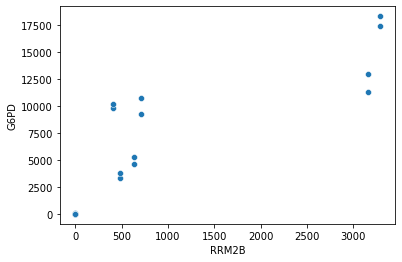

In [79]:
ax = sns.scatterplot(data=df, x="ENSG00000048392.7", y="ENSG00000160211.11")
ax.set_xlabel("RRM2B")
ax.set_ylabel("G6PD")

In [62]:
[i for i in df.index.to_list() if i.startswith("ENSG00000048392")]

['ENSG00000048392.7']

In [50]:
df.loc['ENSG00000160211.11']

1    5748
2      21
3    6580
Name: ENSG00000160211.11, dtype: int64

In [41]:
df = pd.read_csv("GSE223839.top.table.tsv", sep="\t")

In [44]:
df["GeneID"]
"ENSG00000160211" in df["GeneID"].tolist()
df.isnull().sum()

0             2258
1             5648
2             4495
3            23452
4             3034
           ...    
18891    107987343
18892         9087
18893        83869
18894    105379420
18895    105379561
Name: GeneID, Length: 18896, dtype: int64

In [37]:
df.loc[(df['padj'] < 0.05) & (df['log2FoldChange'] > 0.32), :] 

,GeneID,padj,pvalue,lfcSE,stat,log2FoldChange,baseMean,Symbol,Description
0,2258,4.900000e-155,2.750000e-159,0.190,26.891626,5.102855,3925.56,FGF13,fibroblast growth factor 13
1,5648,9.510000e-72,1.070000e-75,0.376,18.411159,6.926902,568.49,MASP1,MBL associated serine protease 1
3,23452,2.650000e-44,5.960000e-48,0.203,14.548610,2.956280,1492.93,ANGPTL2,angiopoietin like 2
4,3034,1.040000e-43,2.910000e-47,0.200,14.439648,2.892186,1550.91,HAL,histidine ammonia-lyase
7,256764,7.670000e-39,3.450000e-42,0.227,13.610904,3.087271,701.58,WDR72,WD repeat domain 72
...,...,...,...,...,...,...,...,...,...
3975,57030,4.920000e-02,1.100000e-02,0.579,2.542827,1.473291,41.38,SLC17A7,solute carrier family 17 member 7
3976,100379249,4.920000e-02,1.100000e-02,0.391,2.542606,0.993457,111.53,BOK-AS1,BOK antisense RNA 1
3977,100852407,4.930000e-02,1.100000e-02,0.468,2.541907,1.189961,315.98,CARS1-AS1,CARS1 antisense RNA 1
3983,113451,4.970000e-02,1.110000e-02,0.316,2.538884,0.803001,193.14,AZIN2,antizyme inhibitor 2
